In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import locale
from scipy import stats

In [149]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [150]:
import chardet

with open("df.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [186]:
df = pd.read_csv("df.csv", encoding="windows-1252")

In [152]:
df.shape

(9994, 21)

In [153]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [154]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.00,72.95


In [155]:
#Retirando os espaços em brancos dos nomes das colunas
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [157]:
df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66
std,2885.16,32063.69,623.25,2.23,0.21,234.26
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2499.25,23223.00,17.28,2.00,0.00,1.73
50%,4997.50,56430.50,54.49,3.00,0.20,8.67
75%,7495.75,90008.00,209.94,5.00,0.20,29.36
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98


In [158]:
df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub-Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [159]:
#Listando todas as variaveis do tipo int e float em busca de outliers
variaveis_numericas = []
for i in df.columns[0:48].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_numericas.append(i)

Row_ID : int64
Postal_Code : int64
Sales : float64
Quantity : int64
Discount : float64
Profit : float64


In [160]:
variaveis_numericas

['Row_ID', 'Postal_Code', 'Sales', 'Quantity', 'Discount', 'Profit']

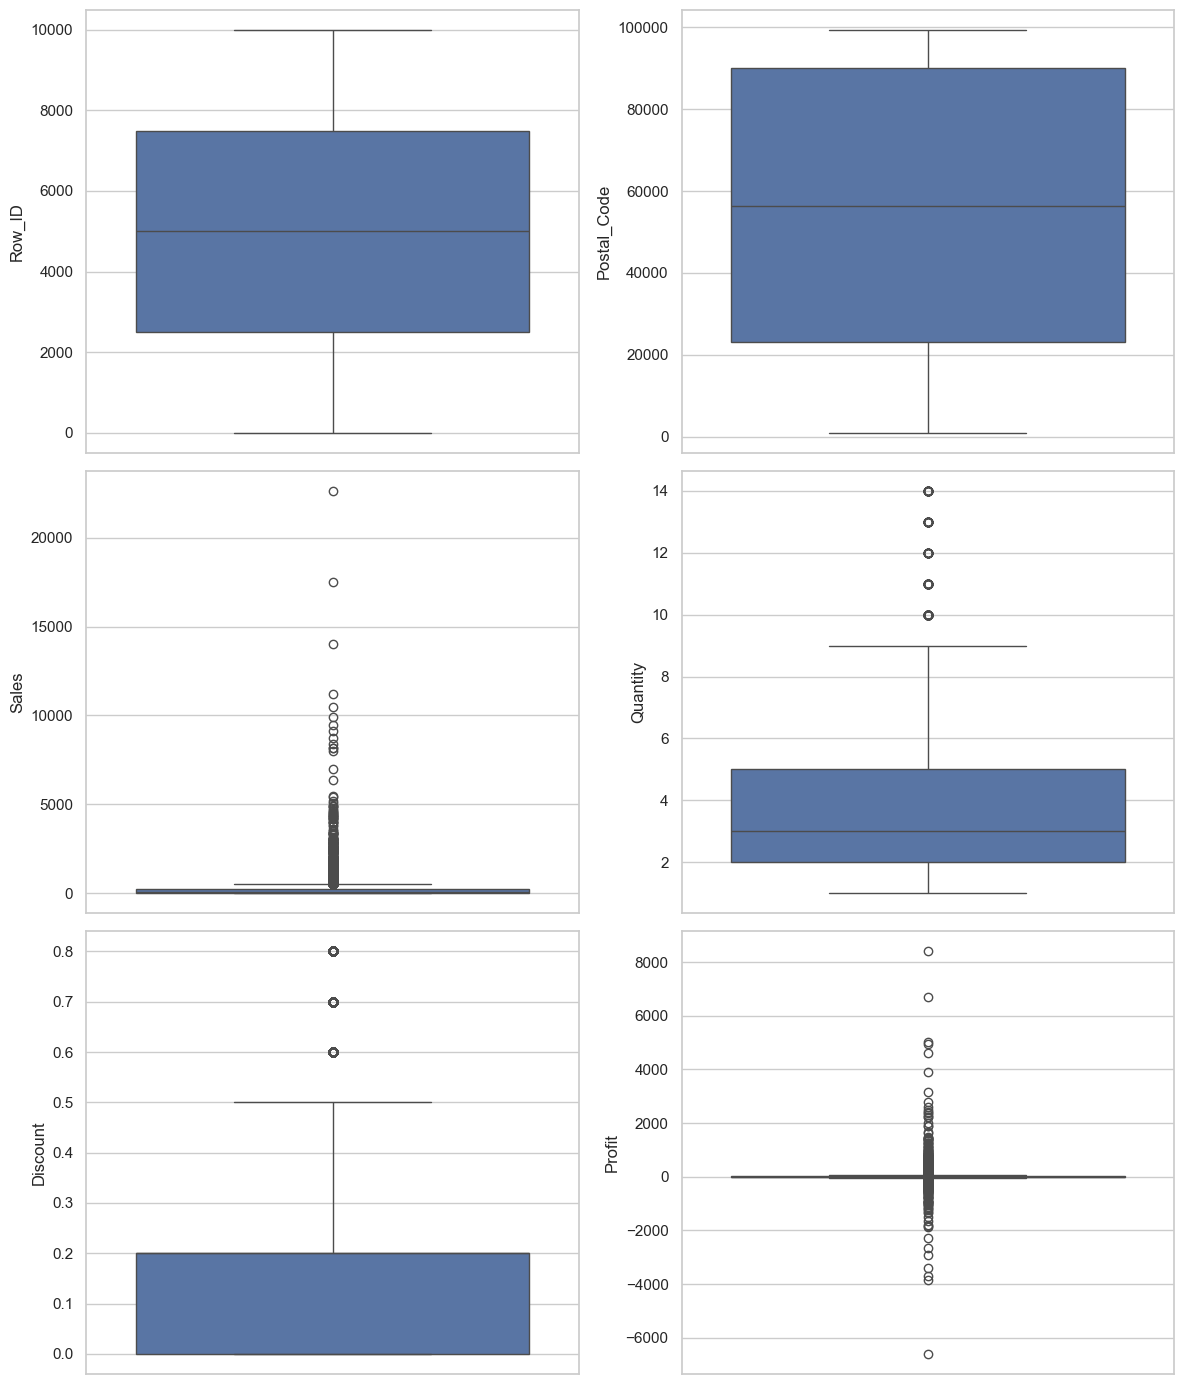

In [161]:
#Usando graficos para facilitar essa busca
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [162]:
#Vendo os valores fiquei em duvida do que fazer com os presentes outliers então deixei para resolver mais na frente
df.loc[df["Sales"]> 5000]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
165,166,CA-2014-139892,9/8/2014,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.95,8,0.40,-1359.99
509,510,CA-2015-145352,3/16/2015,3/22/2015,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,Georgia,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.95,5,0.00,3177.47
683,684,US-2017-168116,11/4/2017,11/4/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.98,4,0.50,-3839.99
2505,2506,CA-2014-143917,7/25/2014,7/27/2014,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,San Francisco,California,94122,West,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,8187.65,5,0.00,327.51
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.20,3919.99
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.50,-1811.08
4098,4099,CA-2014-116904,9/23/2014,9/28/2014,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.00,4630.48
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.00,5039.99
4277,4278,US-2016-107440,4/16/2016,4/20/2016,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,8701,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.93,7,0.00,2365.98
6340,6341,CA-2017-143112,10/5/2017,10/9/2017,Standard Class,TS-21370,Todd Sumrall,Corporate,United States,New York City,New York,10035,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",5199.96,4,0.00,1351.99


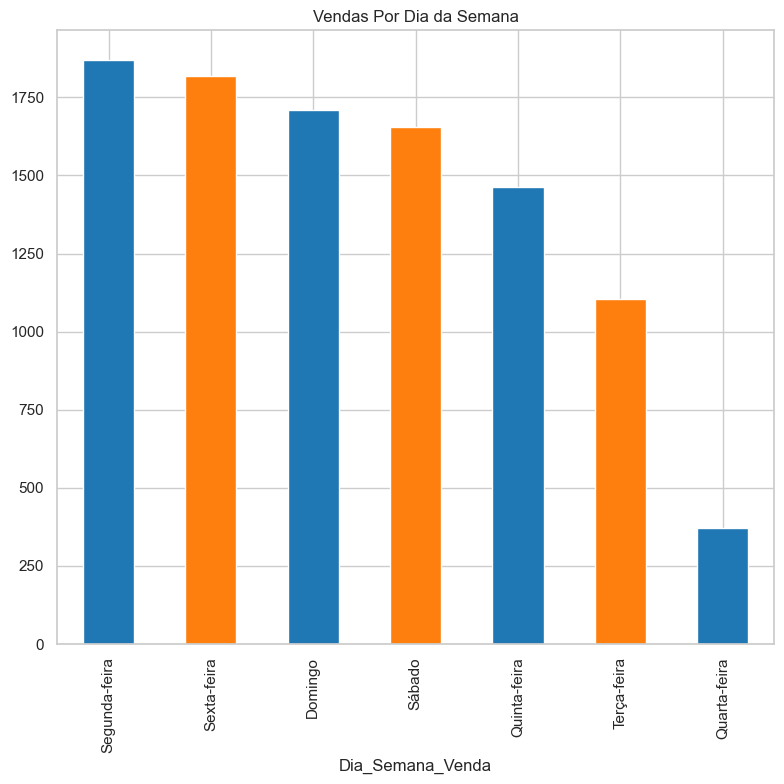

In [163]:
#Grafico de vendas por dia da semana
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df['Order_Date'] =  pd.to_datetime(df['Order_Date'], format='%m/%d/%Y')
df['Order_Date'] = df['Order_Date'].dt.date
df['Ano_Venda'] = pd.DatetimeIndex(df['Order_Date']).year
df['Mes_Venda'] = pd.DatetimeIndex(df['Order_Date']).month
df['Dia_Venda'] = pd.DatetimeIndex(df['Order_Date']).day
df['Dia_Semana_Venda'] = pd.DatetimeIndex(df['Order_Date']).day_name(locale = 'pt_BR.utf8')


plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
df.Dia_Semana_Venda.value_counts().plot(kind='bar', title='Vendas Por Dia da Semana',color = ['#1F77B4', '#FF7F0E']);

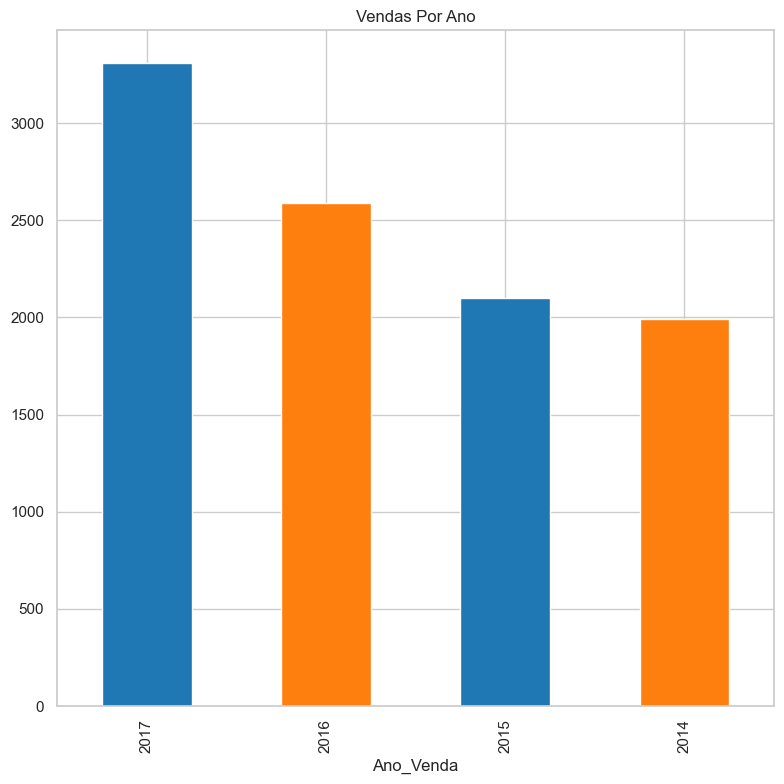

In [164]:
#Grafico de vendas por ano
df.Ano_Venda.value_counts().plot(kind='bar', title='Vendas Por Ano',color = ['#1F77B4', '#FF7F0E']);

In [165]:
#Receita gerada no periodo analisado
df['positivo'] = df['Profit'].apply(lambda x: x if x > 0 else 0)
df['negativo'] = df['Profit'].apply(lambda x: x if x < 0 else 0)
print('Valor total de faturamento: ', df['Sales'].sum())
print('Valor total de lucro: ', df['Profit'].sum())
print('Valor total de vendas que geraram prejuizo: ', df['negativo'].sum())
print('Valor total de vendas que geraram lucro: ', df['positivo'].sum())

Valor total de faturamento:  2297200.8603000003
Valor total de lucro:  286397.0217
Valor total de vendas que geraram prejuizo:  -156131.2857
Valor total de vendas que geraram lucro:  442528.3074


In [166]:
correlacao = df['Discount'].corr(df['Profit'])
print(f"\nCorrelação entre Desconto e Lucro: {correlacao:.2f}")


Correlação entre Desconto e Lucro: -0.22


In [167]:
media_lucro_sem_desconto = df[df['Discount'] == 0]['Profit'].mean()
media_lucro_com_desconto = df[df['Discount'] > 0]['Profit'].mean()
print("\nMédia de Lucro:")
print(f"- Sem desconto: ${media_lucro_sem_desconto:.2f}")
print(f"- Com desconto: ${media_lucro_com_desconto:.2f}")


Média de Lucro:
- Sem desconto: $66.90
- Com desconto: $-6.66


In [168]:
# Teste estatístico
t_stat, p_value = stats.ttest_ind(
    df[df['Discount'] > 0]['Profit'],
    df[df['Discount'] == 0]['Profit']
)

print("\nTeste estatístico (comparação entre grupos com e sem desconto):")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Teste estatístico (comparação entre grupos com e sem desconto):
t-statistic: -15.88
p-value: 0.0000


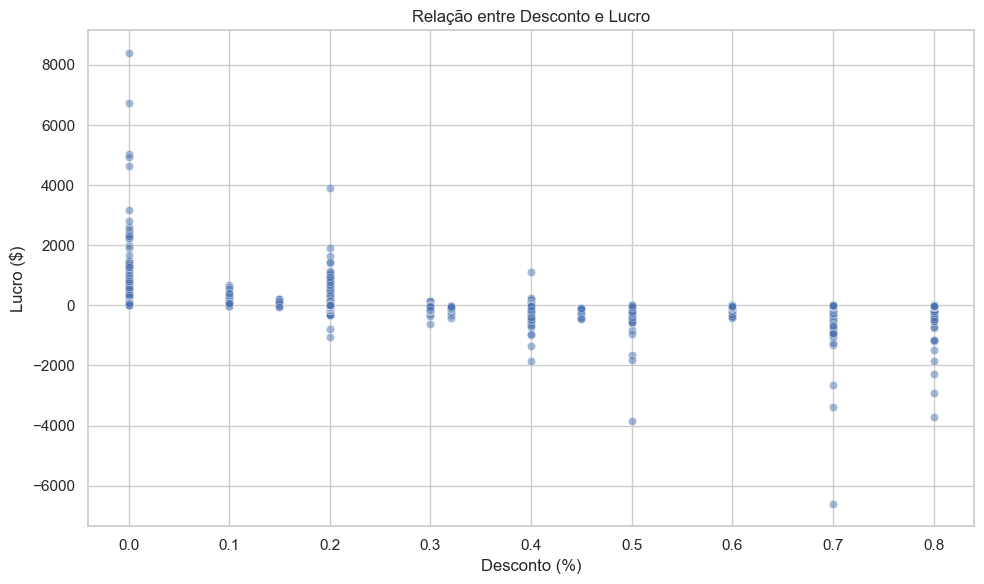

In [169]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title('Relação entre Desconto e Lucro')
plt.xlabel('Desconto (%)')
plt.ylabel('Lucro ($)')
plt.show()

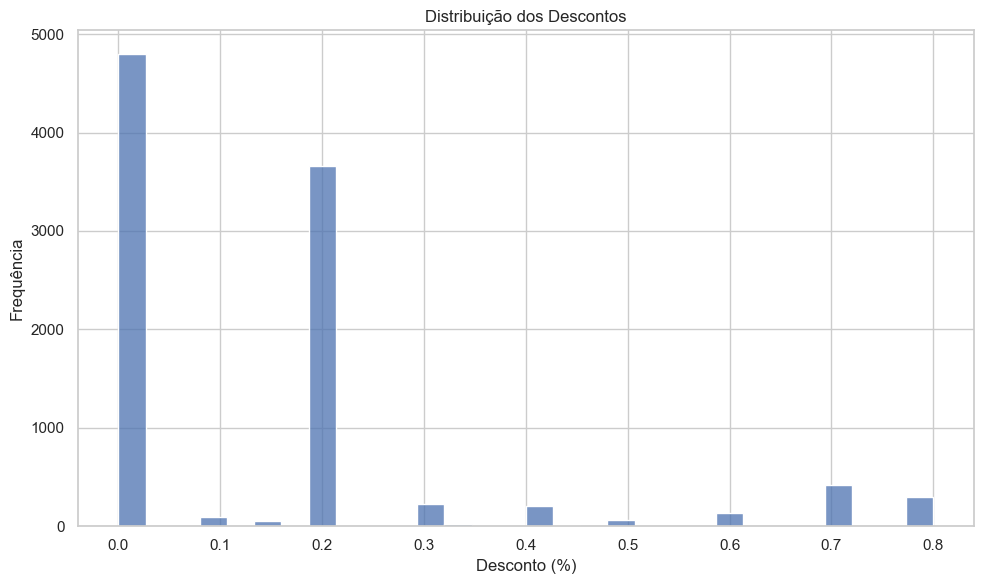

In [170]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Discount', bins=30)
plt.title('Distribuição dos Descontos')
plt.xlabel('Desconto (%)')
plt.ylabel('Frequência')
plt.show()

In [171]:
analise_regional = df.groupby('Region').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Discount': 'mean'
}).round(2)

# Renomear as colunas para melhor legibilidade
analise_regional.columns = [
    'Vendas_Totais', 'Venda_Média', 'Num_Pedidos',
    'Lucro_Total', 'Lucro_Médio', 'Desconto_Médio'
]
print("\nMétricas principais por região:")
analise_regional


Métricas principais por região:


,Vendas_Totais,Venda_Média,Num_Pedidos,Lucro_Total,Lucro_Médio,Desconto_Médio
Region,,,,,,
Central,501239.89,215.77,2323,39706.36,17.09,0.24
East,678781.24,238.34,2848,91522.78,32.14,0.15
South,391721.90,241.80,1620,46749.43,28.86,0.15
West,725457.82,226.49,3203,108418.45,33.85,0.11


In [172]:
df['Margem'] = (df['Profit'] / df['Sales']) * 100
print("\nMargem de Lucro Média por Região:")
margem_regional = df.groupby('Region')['Margem'].mean().round(2)
print(margem_regional)


Margem de Lucro Média por Região:
Region
Central   -10.41
East       16.72
South      16.35
West       21.95
Name: Margem, dtype: float64


<Figure size 1200x600 with 0 Axes>

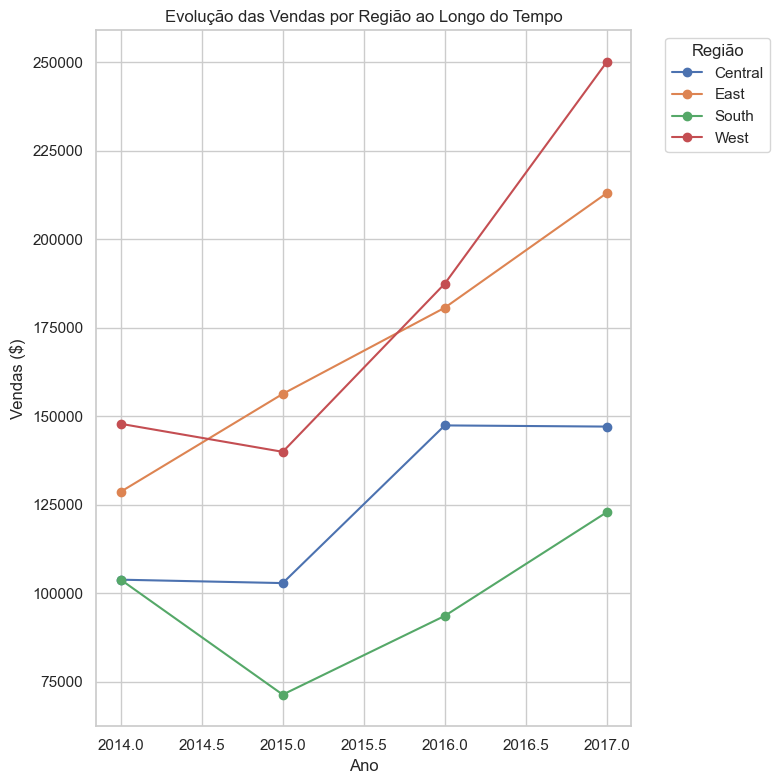

In [175]:
vendas_tempo = df.groupby(['Ano_Venda', 'Region'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 6))
vendas_tempo.plot(marker='o')
plt.title('Evolução das Vendas por Região ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas ($)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [180]:
print("\nPrincipais Categorias por Região:")
categorias_regiao = pd.crosstab(df['Region'], df['Category'], values=df['Profit'], aggfunc='sum')
print(categorias_regiao.round(2))


Principais Categorias por Região:
Category  Furniture  Office Supplies  Technology
Region                                          
Central    -2871.05          8879.98    33697.43
East        3046.17         41014.58    47462.04
South       6771.21         19986.39    19991.83
West       11504.95         52609.85    44303.65


<Figure size 1200x600 with 0 Axes>

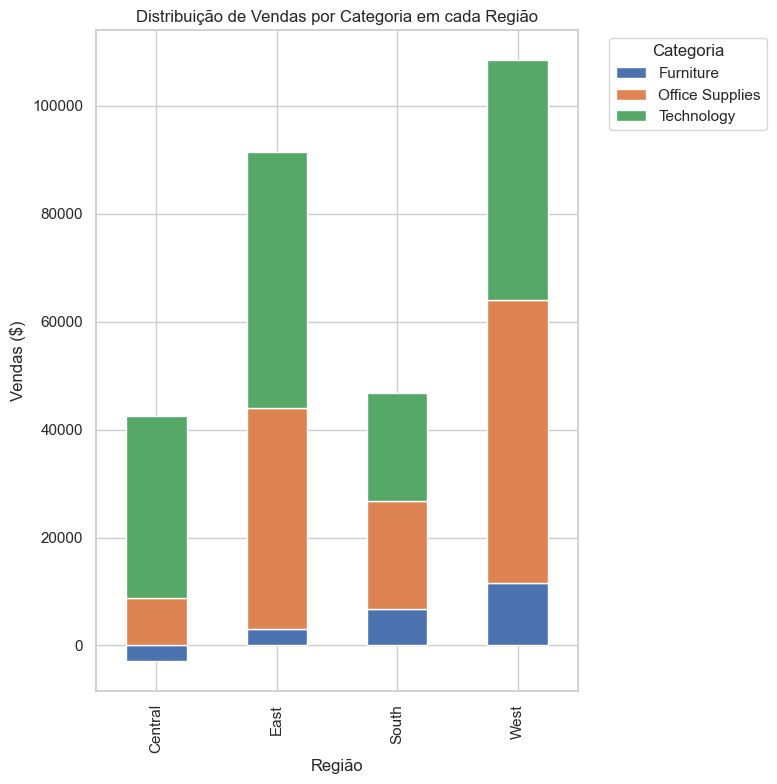

In [ ]:
plt.figure(figsize=(12, 6))
categorias_regiao.plot(kind='bar', stacked=True)
plt.title('Distribuição de Vendas por Categoria em cada Região')
plt.xlabel('Região')
plt.ylabel('Lucros ($)')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [174]:
valores_unicos = []
for i in df.columns[0:21].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

Row_ID : 9994
Order_ID : 5009
Order_Date : 1237
Ship_Date : 1334
Ship_Mode : 4
Customer_ID : 793
Customer_Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Postal_Code : 631
Region : 4
Product_ID : 1862
Category : 3
Sub-Category : 17
Product_Name : 1850
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287
